In [12]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline

In [13]:
#Gathering Data
Credit = pd.read_csv("/Users/ummatanmoy/Desktop/Data_Analysis/netflow_day-02.csv", sep=",",index_col=False, nrows = 1000)

In [14]:
#First 1000 Rows of Data
Credit.head(1000)

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0
5,118785,63173,IP564116,Comp141988,17,5060,5060,7061,0,5745536,0
6,118785,78594,IP564116,Comp141988,17,5060,5060,8638,0,7052947,0
7,118785,90763,IP564116,Comp141988,17,5060,5060,9943,0,8105139,0
8,118785,104427,IP564116,Comp141988,17,5060,5060,11544,0,9398696,0
9,118785,115677,IP564116,Comp141988,17,5060,5060,13011,0,10586412,0


In [15]:
#Selecting String Value Fields To Be Used In Modelling
X = Credit [[' srcBytes',' srcPackets',' dstBytes',' dstPackets']]

In [16]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [17]:
#Assining Column Names
X_normalized.columns = ['srcBytes','srcPackets','dstBytes', 'dstPackets']

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [19]:
#Assigning cluster centers
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['srcBytes','srcPackets','dstBytes', 'dstPackets']))

Cluster centers of columns:

   srcBytes  srcPackets  dstBytes  dstPackets
0  0.908104    0.908142  0.914847    0.922063
1  0.004066    0.002403  0.002879    0.000386


In [20]:
from sklearn import metrics
from scipy.spatial.distance import cdist

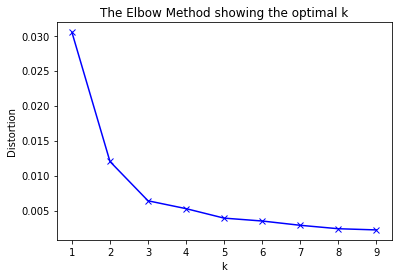

In [21]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
#Average Silhouette method
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)


For n_clusters = 2 The average silhouette_score is : 0.9915047583494626
For n_clusters = 3 The average silhouette_score is : 0.9726328603700924
For n_clusters = 4 The average silhouette_score is : 0.970103868864819
For n_clusters = 5 The average silhouette_score is : 0.9549317135494099
For n_clusters = 6 The average silhouette_score is : 0.958032429722101
For n_clusters = 7 The average silhouette_score is : 0.9329407640373801
For n_clusters = 8 The average silhouette_score is : 0.9326411134409783
For n_clusters = 9 The average silhouette_score is : 0.9299454299165634


In [24]:
#Mean-Shift Clustering
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 20


In [25]:
#Gaussian Mixture Method
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 20


In [34]:
dataCopy = Credit

In [35]:
labels = kmeans.labels_
dataCopy['clusters'] = labels
X2 = [' srcPackets',' dstPackets',' srcBytes',' dstBytes', 'clusters']

In [36]:
dataCopy.head()

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes,clusters
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018,0
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408,0
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0,0


In [37]:
#Individual Cluster ID
dataCopy.ix[310]

time                119169
 duration            14275
 srcDevice      Comp004479
 dstDevice      Comp274690
 protocol                6
 srcPort         Port17617
 dstPort              2049
 srcPackets       84515677
 dstPackets      588887960
 srcBytes       8197543524
 dstBytes      22300992620
clusters                 0
Name: 310, dtype: object

In [38]:
#Individual Cluster ID
dataCopy.ix[312]

time                119169
 duration            46850
 srcDevice      Comp004479
 dstDevice      Comp274690
 protocol                6
 srcPort         Port17617
 dstPort              2049
 srcPackets      188012056
 dstPackets     1106026322
 srcBytes      18243509496
 dstBytes      45576786992
clusters                 1
Name: 312, dtype: object

In [39]:
print (dataCopy[X2].groupby(['clusters']).mean())

            srcPackets    dstPackets      srcBytes      dstBytes
clusters                                                        
0         5.363230e+05  1.018670e+06  8.236537e+07  1.535036e+08
1         1.880244e+08  1.106032e+09  1.824479e+10  4.557780e+10


In [28]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

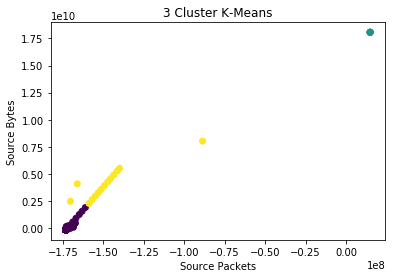

In [29]:
#Graph for Clusters
variables = pandas.read_csv("/Users/ummatanmoy/Desktop/Data_Analysis/netflow_day-02.csv", nrows = 1000)
Y = variables[[' srcBytes']]
X = variables[[' srcPackets']]

pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y)
kmeansoutput
pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Source Packets')
pl.ylabel('Source Bytes')
pl.title('3 Cluster K-Means')
pl.show()

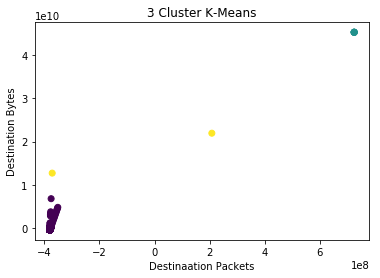

In [30]:
variables = pandas.read_csv("/Users/ummatanmoy/Desktop/Data_Analysis/netflow_day-02.csv", nrows = 1000)
Y = variables[[' dstBytes']]
X = variables[[' dstPackets']]

pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y)
kmeansoutput
pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Destinaation Packets')
pl.ylabel('Destination Bytes')
pl.title('3 Cluster K-Means')
pl.show()

Cluster centers of columns:

    srcPackets   dstPackets   srcBytes   dstBytes
0     0.004514     0.002852   0.003368   0.000921
1     0.999874     0.999883   0.999962   0.999991


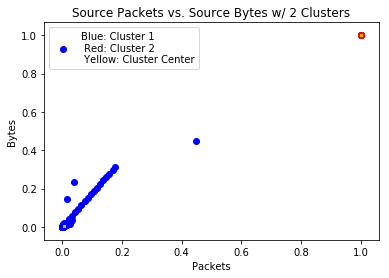

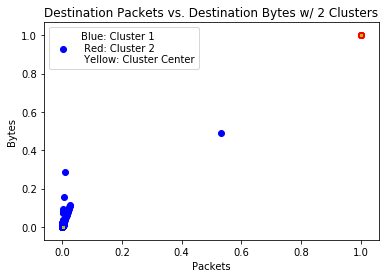

In [31]:
#SOURCE PACKETS VS SOURCE BYTES

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)


centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= [' srcPackets',' dstPackets',' srcBytes',' dstBytes']))


# Creating new Dataframe with Cluster IDs
labels = kmeans.labels_
df = X_normalized
df["centroid"] = labels


dfOne = df[["srcPackets", "srcBytes", "centroid"]]

np.set_printoptions(suppress=True)
x = dfOne['srcPackets'].values
y = dfOne['srcBytes'].values
z = dfOne['centroid'].values



# Stacking x (srcPackets), y (srcBytes), and z (centroid)
z=np.vstack((x,y,z))

j=0
for i in z[2, :]:
    if i == 1:
        plt.scatter(z[0,:][j], z[1,:][j], c="r")
        plt.scatter(centers[1][0], centers[1][2], c="y", marker="s", s = 5)
    elif i == 0:
        plt.scatter(z[0,:][j], z[1,:][j], c="b")
        plt.scatter(centers[0][0], centers[0][2], c="y", marker="s", s = 5)
    j = j+1
        
plt.legend(["Blue: Cluster 1 \n Red: Cluster 2 \n Yellow: Cluster Center"])
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.title("Source Packets vs. Source Bytes w/ 2 Clusters")
plt.show()

#DESTINATION PACKETS VS DESTINATION BYTES
dfOne = df[["dstPackets", "dstBytes", "centroid"]]

np.set_printoptions(suppress=True)
x = dfOne['dstPackets'].values
y = dfOne['dstBytes'].values
z = dfOne['centroid'].values



# Stacking x (dstPackets), y (dstBytes), and z (centroid)
z=np.vstack((x,y,z))

j=0
for i in z[2, :]:
    if i == 1:
        plt.scatter(z[0,:][j], z[1,:][j], c="r")
        plt.scatter(centers[1][1], centers[1][3], c="y", marker="s", s = 5)
    elif i == 0:
        plt.scatter(z[0,:][j], z[1,:][j], c="b")
        plt.scatter(centers[0][1], centers[0][3], c="y", marker="s", s = 5)
    j = j+1
        
plt.legend(["Blue: Cluster 1 \n Red: Cluster 2 \n Yellow: Cluster Center"])
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.title("Destination Packets vs. Destination Bytes w/ 2 Clusters")
plt.show()

In [2]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [4]:
#Gathering Data
Credit = pd.read_csv("/Users/ummatanmoy/Desktop/Data_Analysis/netflow_day-02.csv",sep=",",index_col=False, nrows = 1000)

In [30]:
#First 5 Rows of Data
Credit.head()

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [6]:
#Selecting String Value Fields To Be Used In Modelling
X = Credit [[' srcBytes',' srcPackets',' dstBytes',' dstPackets']]

In [7]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [8]:
#Assigning Column Names
X_normalized.columns = ['srcBytes','srcPackets','dstBytes', 'dstPackets']

In [9]:
#Implementing Algorithm
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [10]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [11]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [12]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,100
1,900


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1046afb70>,
      dtype=object)

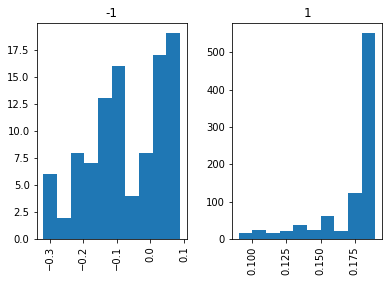

In [13]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [14]:
#Descriptive Statistics
X['Anomaly_Score'].describe()

count    1000.000000
mean        0.148175
std         0.084656
min        -0.319064
25%         0.152042
50%         0.182738
75%         0.187506
max         0.190077
Name: Anomaly_Score, dtype: float64

In [15]:
#Implementing Algorithm With Different Parameters
#contamination: Proportion of outliers in the data set
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [16]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [17]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [18]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()

,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,200
1,800


array([<matplotlib.axes._subplots.AxesSubplot object at 0x107ef7a20>,
      dtype=object)

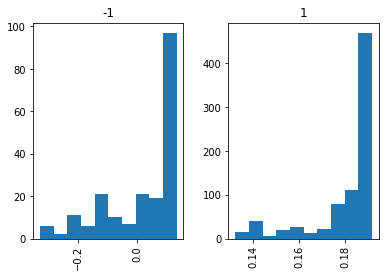

In [19]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])

In [20]:
#Descriptive Statistics
X['Anomaly_Score_Contamination'].describe()

count    1000.000000
mean        0.148071
std         0.087140
min        -0.327979
25%         0.142810
50%         0.183776
75%         0.190040
max         0.191458
Name: Anomaly_Score_Contamination, dtype: float64

In [21]:
#Implementing Algorithm With Different Parameters
#bootstrap: If True, individual trees are fit on random subsets of the training data sampled with replacement.
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [22]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [23]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [24]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()

,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,100
1,900


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10cf600b8>,
      dtype=object)

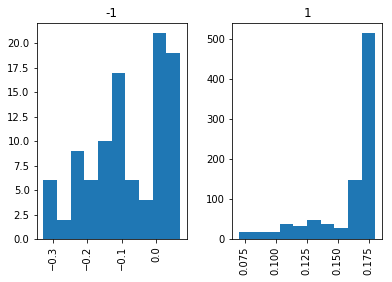

In [25]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])

In [26]:
#Original Data Set With New Variables
X.head()

,srcBytes,srcPackets,dstBytes,dstPackets,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,0,0,1042329018,755065,-1,-0.015414,-1,-0.043987,-1,-0.021524
1,300810,1665,250408,1108,1,0.187214,1,0.190695,1,0.178435
2,1477041,1866,0,0,1,0.188356,1,0.188523,1,0.174567
3,2656305,3326,0,0,1,0.186275,1,0.189711,1,0.173850
4,4388449,5423,0,0,1,0.184802,1,0.186484,1,0.172321


In [27]:
#Top 5 Anomaly Records
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,-0.043987,-0.021524,-0.015414
4,0.186484,0.172321,0.184802
2,0.188523,0.174567,0.188356
3,0.189711,0.173850,0.186275
1,0.190695,0.178435,0.187214


Automatically created module for IPython interactive environment


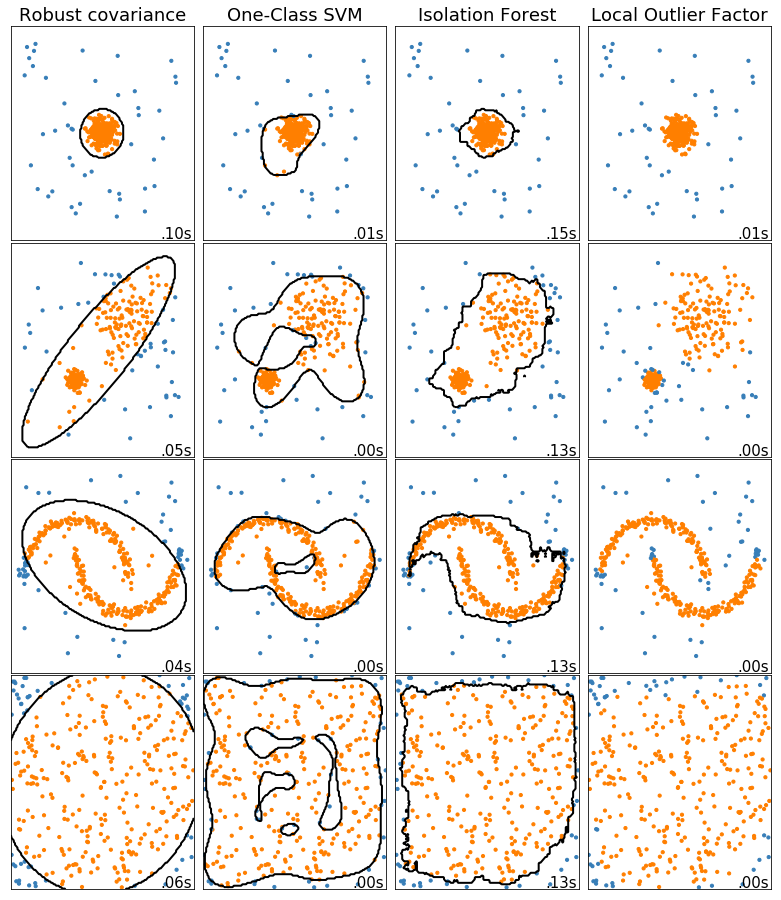

In [29]:
#Comparing anomaly detection algorithms for outlier detection on toy datasets
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_clusters = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()